In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, LSTM, Dense

# Found out about this cool function from someone else's code:
# it automatically partitions a data set into training and validation data
from sklearn.model_selection import train_test_split

from toolbox import Preprocessing, VideoAnalysis, PredictionSample

In [7]:
dataFiles = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)

propertyFiles = Preprocessing.loadRunData(dataFiles)
videos = Preprocessing.loadVideo(dataFiles)
matFiles = Preprocessing.loadMatFile(dataFiles)

In [8]:
# Import the data
fT = .4
sL = 8

scores = [VideoAnalysis.averageBrightness]#, VideoAnalysis.standardDeviation]

inputs, outputs = PredictionSample.fullPredictionSample(videos, propertyFiles, matFiles, scores, sampleLength=sL, forceEventThreshhold=fT)

In [14]:
# Partition the data
# 42 is just a random seed, and we'll take 10% of the data for validation
trainingInput, validationInput, trainingOutput, validationOutput = train_test_split(inputs, outputs, test_size=0.1, random_state=42)
print(np.shape(trainingInput))
print(np.shape(validationInput))

(1389, 2, 8)
(155, 2, 8)


In [24]:
print(inputs[300:310])

[[[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]]


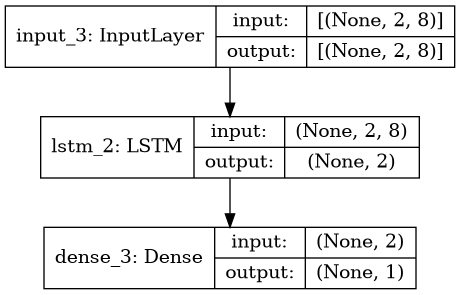

In [5]:
# Setup of the network
# Simple stacked network
model = keras.Sequential()

# Just three layers: an input, an LSTM, and the output, which should be either 1 or 0
model.add(Input(shape=(len(scores), sL)))
model.add(LSTM(len(scores), activation='relu'))
#model.add(Dense(40, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

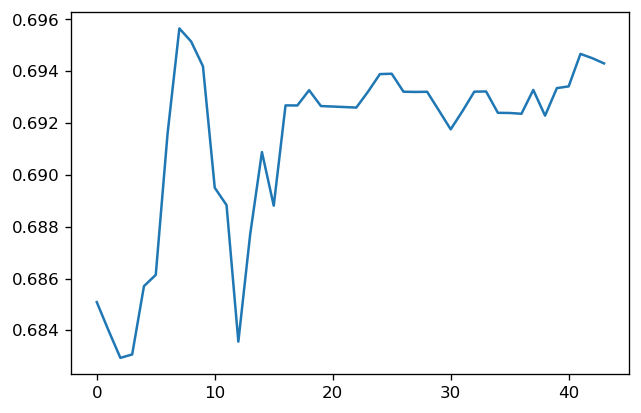

In [101]:
#batchsize = 50
numEpochs = 5
#cost = []

model.fit(trainingInput, trainingOutput, epochs=numEpochs)
model.evaluate(validationInput, validationOutput)

#for i in range(len(inputs)%batchsize):
#    cost.append(model.train_on_batch(inputs[i:min(i+batchsize,len(inputs)),1:,:], outputs[i:min(i+batchsize,len(inputs))])[0])
#plt.plot(cost)